In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
hset= pd.read_csv('datasets/hashset/HashSet-Manual.csv')
hset_dist = pd.read_csv('datasets/hashset/HashSet-Distant.csv')
df = hset

In [3]:
df.columns

Index(['Unnamed: 0', 'Hashtag', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', 'Source', 'id', 'topk', 'mutlitoken', 'charner', 'answer',
       'annotator', 'annotation_id', 'created_at', 'updated_at', 'lead_time',
       'Final Segmentation'],
      dtype='object')

In [4]:
df['mutlitoken'] = df['mutlitoken'].fillna('None')
df['charner'] = df['charner'].fillna('None')
## drop duplicates, keep the first occurence in the dataset.
df.drop_duplicates(subset ="Hashtag",keep = 'first', inplace = True)
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [5]:
df

,Hashtag,1,2,3,4,5,6,7,8,9,...,topk,mutlitoken,charner,answer,annotator,annotation_id,created_at,updated_at,lead_time,Final Segmentation
0,bhoomi,bhoomi,bhoom i,bhoo mi,bho omi,b hoomi,bhoo m i,bho om i,bh oomi,bho o mi,...,$1,Hashtag has non english token,"[{""start"": 0, ""end"": 6, ""text"": ""bhoomi"", ""lab...","{""text"": [""bhoomi"", ""bhoomi""]}",4,1802,2021-12-30T08:14:32.339494Z,2022-01-06T13:31:39.895165Z,130.487,bhoomi
1,dominos,dominos,domino s,do minos,domi nos,domin os,dom inos,dom in os,d ominos,do min os,...,$1,Hashtag has named entities,"[{""start"": 0, ""end"": 7, ""text"": ""dominos"", ""la...","{""text"": [""dominos"", ""dominos""]}",4,1495,2021-12-19T13:05:36.015797Z,2022-01-06T13:30:46.514042Z,77.056,dominos
2,psgfcgb,psgfcgb,psgfcg b,p sgfcgb,psgfc gb,ps gfcgb,psg fcgb,psgfc g b,psgf cgb,p s gfcgb,...,$6,Hashtag has named entities,"[{""start"": 3, ""end"": 7, ""text"": ""fcgb"", ""label...","{""text"": [""psgfcgb"", ""psgfcgb""]}",1,740,2021-10-26T10:06:59.823018Z,2022-01-06T13:30:13.206473Z,43.687,psg fcgb
3,mazdoorno1,mazdoorno1,mazdoor no1,mazdoorno 1,mazdoor no 1,m azdoorno1,ma zdoorno1,mazdoorn o1,maz doorno1,mazdoorn o 1,...,$4,Hashtag has non english token,None,"{""text"": [""mazdoorno1"", ""mazdoorno1""]}",3,2418,2022-01-05T09:24:57.092193Z,2022-01-05T09:25:03.734694Z,3438.726,mazdoor no 1
4,pappukabhibadleganahi,pappukabhibadleganahi,pappukabhibadleganah i,pappukabhibadlegana hi,pappukabhibadlega nahi,p appukabhibadleganahi,pa ppukabhibadleganahi,pappu kabhibadleganahi,pappukabhibadlegan ahi,pap pukabhibadleganahi,...,None,"{""choices"": [""Hashtag has non english token "",...","[{""start"": 0, ""end"": 5, ""text"": ""pappu"", ""labe...","{""text"": [""pappu kabhi badlega nahi"", ""pappuka...",3,2380,2022-01-05T09:08:48.447382Z,2022-01-05T09:09:03.040336Z,2478.165,pappu kabhi badlega nahi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,masterchefturkiye,masterchefturkiye,masterchefturkiy e,masterchefturki ye,m asterchefturkiye,masterchef turkiye,mastercheftur kiye,master chefturkiye,ma sterchefturkiye,mast erchefturkiye,...,$5,Hashtag has named entities,"[{""start"": 0, ""end"": 10, ""text"": ""masterchef"",...",masterchefturkiye,4,368,2021-09-24T05:18:49.069344Z,2021-09-24T05:18:49.069390Z,63.433,masterchef turkiye
1897,imacelebrity,imacelebrity,i m a celebrity,im a celebrity,ima celebrity,imacelebrit y,i ma celebrity,i macelebrity,im acelebrity,imacelebri ty,...,$2,None,None,imacelebrity,4,367,2021-09-24T05:17:41.910491Z,2021-09-24T05:17:41.910538Z,27.581,i m a celebrity
1898,merryxmas,merry xmas,merry x mas,merryxmas,merryxm as,merryxma s,m erryxmas,me rryxmas,merryx mas,merry xm as,...,$1,Hashtag has named entities,"[{""start"": 5, ""end"": 9, ""text"": ""xmas"", ""label...",merryxmas,4,365,2021-09-24T05:16:47.398608Z,2021-09-24T05:16:47.398669Z,35.430,merry xmas
1899,endbengalviolence,endbengalviolence,endbengalviolenc e,e ndbengalviolence,en dbengalviolence,endbengalviolen ce,endbengal violence,end bengalviolence,end bengal violence,endbengalviole nce,...,$8,Hashtag has named entities,"[{""start"": 3, ""end"": 9, ""text"": ""bengal"", ""lab...",endbengalviolence,4,363,2021-09-15T11:27:29.142987Z,2021-09-15T11:27:29.143033Z,36.490,end bengal violence


### Named Entity Validation

In [6]:
cnt = 0 
for index,row in df.iterrows():
    #print(row[0])
    ne = row['charner']
    choices = row['mutlitoken']
    try:
        isner = eval(choices)
    except:
        isner = choices
    if ne != 'None':
            #print(ne, isner)
            if type(isner) is str:
                if isner == 'Hashtag has named entities':
                    #print('isner is a string')
                    pass
                else:
                    print("Error")
                    print("Marked Ner:",ne)
                    print("Options Marked:",choices)
                    print('\n\n\n')
                    cnt+=1
            if type(isner) is dict:
                if 'Hashtag has named entities' in isner['choices']:
                    pass
                else:
                    print("Error")
                    print("Marked Ner:",ne)
                    print("Options Marked:",choices)
                    print('\n\n\n')
                    cnt+=1
print("Total Errors", cnt)

Error
Marked Ner: [{"start": 0, "end": 6, "text": "bhoomi", "labels": ["Named Entity"]}]
Options Marked: Hashtag has non english token 




Error
Marked Ner: [{"start": 0, "end": 9, "text": "geschenke", "labels": ["Named Entity"]}]
Options Marked: Hashtag has non english token 




Error
Marked Ner: [{"start": 0, "end": 3, "text": "bam", "labels": ["Not Named Entity"]}, {"start": 3, "end": 9, "text": "bholle", "labels": ["Not Named Entity"]}]
Options Marked: Hashtag has non english token 




Error
Marked Ner: [{"start": 10, "end": 15, "text": "dilli", "labels": ["Named Entity"]}]
Options Marked: {"choices": ["Hashtag has non english token ", "Hashtag has a mix of english and hindi tokens"]}




Error
Marked Ner: [{"start": 0, "end": 11, "text": "christopher", "labels": ["Named Entity"]}, {"start": 11, "end": 16, "text": "nolan", "labels": ["Named Entity"]}]
Options Marked: Hashtag has non english token 




Error
Marked Ner: [{"start": 0, "end": 6, "text": "bharat", "labels": ["Named 

### Unique Hashtags 

In [7]:
print('Unique Hashtags:', df['Hashtag'].nunique())

Unique Hashtags: 1901


### IN 1-10, None

In [8]:
df['topk'].unique()

array(['$1', '$6', '$4', 'None', '$2', '$3', '$10', '$8', '$5', '$9',
       '$7'], dtype=object)

In [9]:
df['topk'].value_counts()

$1      657
None    447
$2      381
$3      112
$4       64
$5       53
$8       45
$9       41
$6       38
$7       37
$10      26
Name: topk, dtype: int64

### Single Hashtags 

In [10]:
df['topk'].value_counts()

$1      657
None    447
$2      381
$3      112
$4       64
$5       53
$8       45
$9       41
$6       38
$7       37
$10      26
Name: topk, dtype: int64

In [11]:
cnt=0
ans_list = []
for index,rows in df.iterrows():
    htg = rows['Hashtag']
    topk = str(rows['topk'])
    answer = ""
    if topk == "Ambigous":
        ans_list.append('AMBIGOUS')
        continue
    if topk != "None": 
        topk = topk.replace("$","")
        answer = rows[topk]
        #print('Answer in top 10:',answer)
    else:
        try:
            xx = eval(rows['answer'])
            answer = xx['text'][0]
            #print('dict',answer)

        except:
            answer = rows['answer']
            #print('str',answer)
            
    ans_list.append(answer)
    if answer == htg:
        cnt+=1
print('Single Token Hashtags',cnt)

Single Token Hashtags 396


In [12]:
df.columns

Index(['Hashtag', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Source',
       'id', 'topk', 'mutlitoken', 'charner', 'answer', 'annotator',
       'annotation_id', 'created_at', 'updated_at', 'lead_time',
       'Final Segmentation'],
      dtype='object')

In [13]:
df

,Hashtag,1,2,3,4,5,6,7,8,9,...,topk,mutlitoken,charner,answer,annotator,annotation_id,created_at,updated_at,lead_time,Final Segmentation
0,bhoomi,bhoomi,bhoom i,bhoo mi,bho omi,b hoomi,bhoo m i,bho om i,bh oomi,bho o mi,...,$1,Hashtag has non english token,"[{""start"": 0, ""end"": 6, ""text"": ""bhoomi"", ""lab...","{""text"": [""bhoomi"", ""bhoomi""]}",4,1802,2021-12-30T08:14:32.339494Z,2022-01-06T13:31:39.895165Z,130.487,bhoomi
1,dominos,dominos,domino s,do minos,domi nos,domin os,dom inos,dom in os,d ominos,do min os,...,$1,Hashtag has named entities,"[{""start"": 0, ""end"": 7, ""text"": ""dominos"", ""la...","{""text"": [""dominos"", ""dominos""]}",4,1495,2021-12-19T13:05:36.015797Z,2022-01-06T13:30:46.514042Z,77.056,dominos
2,psgfcgb,psgfcgb,psgfcg b,p sgfcgb,psgfc gb,ps gfcgb,psg fcgb,psgfc g b,psgf cgb,p s gfcgb,...,$6,Hashtag has named entities,"[{""start"": 3, ""end"": 7, ""text"": ""fcgb"", ""label...","{""text"": [""psgfcgb"", ""psgfcgb""]}",1,740,2021-10-26T10:06:59.823018Z,2022-01-06T13:30:13.206473Z,43.687,psg fcgb
3,mazdoorno1,mazdoorno1,mazdoor no1,mazdoorno 1,mazdoor no 1,m azdoorno1,ma zdoorno1,mazdoorn o1,maz doorno1,mazdoorn o 1,...,$4,Hashtag has non english token,None,"{""text"": [""mazdoorno1"", ""mazdoorno1""]}",3,2418,2022-01-05T09:24:57.092193Z,2022-01-05T09:25:03.734694Z,3438.726,mazdoor no 1
4,pappukabhibadleganahi,pappukabhibadleganahi,pappukabhibadleganah i,pappukabhibadlegana hi,pappukabhibadlega nahi,p appukabhibadleganahi,pa ppukabhibadleganahi,pappu kabhibadleganahi,pappukabhibadlegan ahi,pap pukabhibadleganahi,...,None,"{""choices"": [""Hashtag has non english token "",...","[{""start"": 0, ""end"": 5, ""text"": ""pappu"", ""labe...","{""text"": [""pappu kabhi badlega nahi"", ""pappuka...",3,2380,2022-01-05T09:08:48.447382Z,2022-01-05T09:09:03.040336Z,2478.165,pappu kabhi badlega nahi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,masterchefturkiye,masterchefturkiye,masterchefturkiy e,masterchefturki ye,m asterchefturkiye,masterchef turkiye,mastercheftur kiye,master chefturkiye,ma sterchefturkiye,mast erchefturkiye,...,$5,Hashtag has named entities,"[{""start"": 0, ""end"": 10, ""text"": ""masterchef"",...",masterchefturkiye,4,368,2021-09-24T05:18:49.069344Z,2021-09-24T05:18:49.069390Z,63.433,masterchef turkiye
1897,imacelebrity,imacelebrity,i m a celebrity,im a celebrity,ima celebrity,imacelebrit y,i ma celebrity,i macelebrity,im acelebrity,imacelebri ty,...,$2,None,None,imacelebrity,4,367,2021-09-24T05:17:41.910491Z,2021-09-24T05:17:41.910538Z,27.581,i m a celebrity
1898,merryxmas,merry xmas,merry x mas,merryxmas,merryxm as,merryxma s,m erryxmas,me rryxmas,merryx mas,merry xm as,...,$1,Hashtag has named entities,"[{""start"": 5, ""end"": 9, ""text"": ""xmas"", ""label...",merryxmas,4,365,2021-09-24T05:16:47.398608Z,2021-09-24T05:16:47.398669Z,35.430,merry xmas
1899,endbengalviolence,endbengalviolence,endbengalviolenc e,e ndbengalviolence,en dbengalviolence,endbengalviolen ce,endbengal violence,end bengalviolence,end bengal violence,endbengalviole nce,...,$8,Hashtag has named entities,"[{""start"": 3, ""end"": 9, ""text"": ""bengal"", ""lab...",endbengalviolence,4,363,2021-09-15T11:27:29.142987Z,2021-09-15T11:27:29.143033Z,36.490,end bengal violence


### Stats from Our Dataset, STAN, BOUN

In [14]:
df['num_segments'] = df['Final Segmentation'].apply(lambda x: len(x.split()))

In [15]:
df

,Hashtag,1,2,3,4,5,6,7,8,9,...,mutlitoken,charner,answer,annotator,annotation_id,created_at,updated_at,lead_time,Final Segmentation,num_segments
0,bhoomi,bhoomi,bhoom i,bhoo mi,bho omi,b hoomi,bhoo m i,bho om i,bh oomi,bho o mi,...,Hashtag has non english token,"[{""start"": 0, ""end"": 6, ""text"": ""bhoomi"", ""lab...","{""text"": [""bhoomi"", ""bhoomi""]}",4,1802,2021-12-30T08:14:32.339494Z,2022-01-06T13:31:39.895165Z,130.487,bhoomi,1
1,dominos,dominos,domino s,do minos,domi nos,domin os,dom inos,dom in os,d ominos,do min os,...,Hashtag has named entities,"[{""start"": 0, ""end"": 7, ""text"": ""dominos"", ""la...","{""text"": [""dominos"", ""dominos""]}",4,1495,2021-12-19T13:05:36.015797Z,2022-01-06T13:30:46.514042Z,77.056,dominos,1
2,psgfcgb,psgfcgb,psgfcg b,p sgfcgb,psgfc gb,ps gfcgb,psg fcgb,psgfc g b,psgf cgb,p s gfcgb,...,Hashtag has named entities,"[{""start"": 3, ""end"": 7, ""text"": ""fcgb"", ""label...","{""text"": [""psgfcgb"", ""psgfcgb""]}",1,740,2021-10-26T10:06:59.823018Z,2022-01-06T13:30:13.206473Z,43.687,psg fcgb,2
3,mazdoorno1,mazdoorno1,mazdoor no1,mazdoorno 1,mazdoor no 1,m azdoorno1,ma zdoorno1,mazdoorn o1,maz doorno1,mazdoorn o 1,...,Hashtag has non english token,None,"{""text"": [""mazdoorno1"", ""mazdoorno1""]}",3,2418,2022-01-05T09:24:57.092193Z,2022-01-05T09:25:03.734694Z,3438.726,mazdoor no 1,3
4,pappukabhibadleganahi,pappukabhibadleganahi,pappukabhibadleganah i,pappukabhibadlegana hi,pappukabhibadlega nahi,p appukabhibadleganahi,pa ppukabhibadleganahi,pappu kabhibadleganahi,pappukabhibadlegan ahi,pap pukabhibadleganahi,...,"{""choices"": [""Hashtag has non english token "",...","[{""start"": 0, ""end"": 5, ""text"": ""pappu"", ""labe...","{""text"": [""pappu kabhi badlega nahi"", ""pappuka...",3,2380,2022-01-05T09:08:48.447382Z,2022-01-05T09:09:03.040336Z,2478.165,pappu kabhi badlega nahi,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,masterchefturkiye,masterchefturkiye,masterchefturkiy e,masterchefturki ye,m asterchefturkiye,masterchef turkiye,mastercheftur kiye,master chefturkiye,ma sterchefturkiye,mast erchefturkiye,...,Hashtag has named entities,"[{""start"": 0, ""end"": 10, ""text"": ""masterchef"",...",masterchefturkiye,4,368,2021-09-24T05:18:49.069344Z,2021-09-24T05:18:49.069390Z,63.433,masterchef turkiye,2
1897,imacelebrity,imacelebrity,i m a celebrity,im a celebrity,ima celebrity,imacelebrit y,i ma celebrity,i macelebrity,im acelebrity,imacelebri ty,...,None,None,imacelebrity,4,367,2021-09-24T05:17:41.910491Z,2021-09-24T05:17:41.910538Z,27.581,i m a celebrity,4
1898,merryxmas,merry xmas,merry x mas,merryxmas,merryxm as,merryxma s,m erryxmas,me rryxmas,merryx mas,merry xm as,...,Hashtag has named entities,"[{""start"": 5, ""end"": 9, ""text"": ""xmas"", ""label...",merryxmas,4,365,2021-09-24T05:16:47.398608Z,2021-09-24T05:16:47.398669Z,35.430,merry xmas,2
1899,endbengalviolence,endbengalviolence,endbengalviolenc e,e ndbengalviolence,en dbengalviolence,endbengalviolen ce,endbengal violence,end bengalviolence,end bengal violence,endbengalviole nce,...,Hashtag has named entities,"[{""start"": 3, ""end"": 9, ""text"": ""bengal"", ""lab...",endbengalviolence,4,363,2021-09-15T11:27:29.142987Z,2021-09-15T11:27:29.143033Z,36.490,end bengal violence,3


### Number of Segments

In [16]:
df['num_segments'].value_counts()

2     692
3     466
1     396
4     233
5      85
6      18
7       9
10      1
8       1
Name: num_segments, dtype: int64

Text(0.5, 1.0, 'Frequency of Number of Hashtags(Our Dataset)')

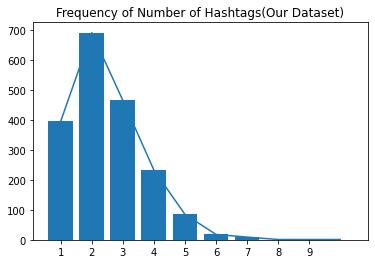

In [17]:
a = df['Hashtag'].groupby(df['num_segments']).count()
plt.bar(a.index,a)
plt.plot(a.index,a)
plt.xticks(np.arange(1,10,1))
plt.title('Frequency of Number of Hashtags(Our Dataset)')

<AxesSubplot:>

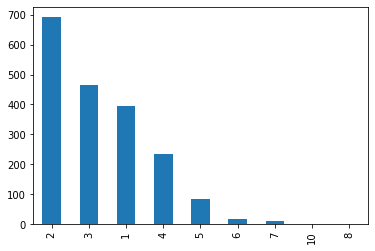

In [18]:
fig, ax = plt.subplots()
df['num_segments'].value_counts().plot(ax=ax, kind='bar')

In [19]:
print('Average Number of Segments:',df['num_segments'].mean())

Average Number of Segments: 2.485007890583903


In [20]:
df['num_segments'].max()

10

In [21]:
df['num_segments'].min()

1

### Average Named Entities per Hashtag 

In [22]:
def get_named_entities(lmao):
    if lmao == 'None':
        return 0
    else:
        return len(list(eval(lmao)))

In [23]:
df['num_ne'] = df['charner'].apply(lambda x: get_named_entities(x))

In [24]:
df['num_ne'].value_counts()

1    901
2    480
0    446
3     70
4      4
Name: num_ne, dtype: int64

In [25]:
print('Average named entities per hashtag',df['num_ne'].mean())

Average named entities per hashtag 1.0978432403997895


In [26]:
df['num_ne'].max()

4

In [27]:
dfx = df.loc[df['topk'] == 'None']
dfx['num_ne'] = dfx['charner'].apply(lambda x: get_named_entities(x))

/tmp/ipykernel_460/906154265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['num_ne'] = dfx['charner'].apply(lambda x: get_named_entities(x))


In [28]:
dfx['num_ne'].value_counts()

1    201
2    122
0     90
3     31
4      3
Name: num_ne, dtype: int64

In [29]:
dfx['num_ne'].mean()

1.2304250559284116

In [30]:
cnt = 0 
for index,row in dfx.iterrows():
    #print(row[0])
    #ne = row['charner']
    choices = row['mutlitoken']
    try:
        isner = eval(choices)
    except:
        isner = choices
    if type(isner) is str and isner == "Hashtag has named entities":
        #print(row['Hashtag'])
        cnt+=1
    if type(isner) is dict and 'Hashtag has named entities' in isner['choices']:
        #print(row['Hashtag'])
        cnt+=1
print("Hashtag has named entities", cnt)

Hashtag has named entities 354


### Non-English Tokens/Named Entities/code-mixed Hashtags

In [31]:
cnt = 0 
for index,row in df.iterrows():
    #print(row[0])
    #ne = row['charner']
    choices = row['mutlitoken']
    try:
        isner = eval(choices)
    except:
        isner = choices
    if type(isner) is str and isner == "Hashtag has non english token ":
        #print(row['Hashtag'])
        cnt+=1
    if type(isner) is dict and 'Hashtag has non english token ' in isner['choices']:
        #print(row['Hashtag'])
        cnt+=1
print("Hashtags with non-english tokens", cnt)

Hashtags with non-english tokens 236


In [32]:
cnt = 0 
for index,row in df.iterrows():
    #print(row[0])
    #ne = row['charner']
    choices = row['mutlitoken']
    try:
        isner = eval(choices)
    except:
        isner = choices
    if type(isner) is str and isner == "Hashtag has named entities":
        #print(row['Hashtag'])
        cnt+=1
    if type(isner) is dict and 'Hashtag has named entities' in isner['choices']:
        #print(row['Hashtag'])
        cnt+=1
print("Hashtag has named entities", cnt)

Hashtag has named entities 1414


In [33]:
cnt = 0 
for index,row in df.iterrows():
    #print(row[0])
    #ne = row['charner']
    choices = row['mutlitoken']
    try:
        isner = eval(choices)
    except:
        isner = choices
    if type(isner) is str and isner == "Hashtag has a mix of english and hindi tokens":
        #print(row['Hashtag'])
        cnt+=1
    if type(isner) is dict and "Hashtag has a mix of english and hindi tokens" in isner['choices']:
        #print(row['Hashtag'])
        cnt+=1
print("Hashtag has mix", cnt)

Hashtag has mix 92


In [34]:
stan = pd.read_csv('datasets/stan-dev-celebi-et-al.csv')
boun = pd.read_csv('datasets/boun-celebi-et-al.csv',header = None)
boun.columns=['Original','Segmented']
stan.columns=['Original','Segmented']


In [35]:
stan['num_segments'] = stan['Segmented'].apply(lambda x :len(x.split()))
boun['num_segments'] = boun['Segmented'].apply(lambda x :len(x.split()))

In [36]:
boun

,Original,Segmented,num_segments
0,tryingtosleep,trying to sleep,3
1,mixture,mixture,1
2,runit,run it,2
3,whatadream,what a dream,3
4,keepitcoming,keep it coming,3
...,...,...,...
994,youareadumbass,you are a dumbass,4
995,newcast6e,newcast6e,1
996,javajunkie,java junkie,2
997,abcfamilysucks,abc family sucks,3


In [37]:
stan

,Original,Segmented,num_segments
0,thexfiles,the x files,3
1,vocaltips,vocal tips,2
2,adventureland,adventureland,1
3,Furahiday,Furahiday,1
4,diving,diving,1
...,...,...,...
1006,tastefringe,taste fringe,2
1007,paparazzi,paparazzi,1
1008,TWOHANDSFLETCHER,TWO HANDS FLETCHER,3
1009,outrageous,outrageous,1


In [38]:
stan['num_segments'].value_counts()

1     532
2     307
3     119
4      32
6       8
5       7
7       2
9       2
11      1
8       1
Name: num_segments, dtype: int64

Text(0.5, 1.0, 'Frequency of Number of Hashtags(Stan)')

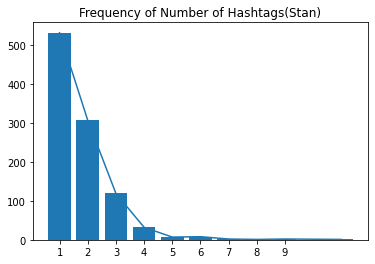

In [39]:
a = stan['Segmented'].groupby(stan['num_segments']).count()
plt.bar(a.index,a)
plt.plot(a.index,a)
plt.xticks(np.arange(1,10,1))
plt.title('Frequency of Number of Hashtags(Stan)')

In [40]:
stan['num_segments'].mean()

1.7457962413452028

In [41]:
boun['num_segments'].value_counts()

2     394
1     258
3     200
4      73
5      40
6      19
7      10
8       2
9       2
10      1
Name: num_segments, dtype: int64

Text(0.5, 1.0, 'Frequency of Number of Hashtags(Boun)')

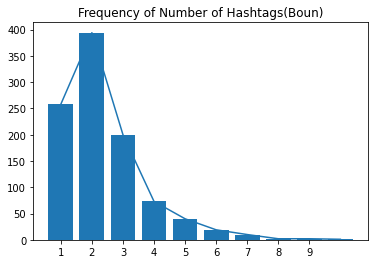

In [42]:
a = boun['Segmented'].groupby(boun['num_segments']).count()
plt.bar(a.index,a)
plt.plot(a.index,a)
plt.xticks(np.arange(1,10,1))
plt.title('Frequency of Number of Hashtags(Boun)')

In [43]:
boun['num_segments'].mean()

2.3683683683683685

In [44]:
def is_camel_case(s):
    capitalCount = len([char for char in s if char.isupper()])
    if capitalCount == 1 and s[0].isupper():
        return False
    return s != s.lower() and s != s.upper() and "_" not in s


In [45]:
boun['isCC'] = boun['Original'].apply(lambda x : is_camel_case(x))
stan['isCC'] = stan['Original'].apply(lambda x : is_camel_case(x))

In [46]:
boun['isCC'].value_counts()

False    721
True     278
Name: isCC, dtype: int64

In [47]:
stan['isCC'].value_counts()

False    877
True     134
Name: isCC, dtype: int64

In [48]:
df['HashLength'] = df['Hashtag'].apply(lambda x : len(x))
print(df['HashLength'].mean())

12.675960021041558


In [49]:
boun['HashLength'] = boun['Original'].apply(lambda x : len(x))
stan['HashLength'] = stan['Original'].apply(lambda x : len(x))


In [50]:
print(boun['HashLength'].mean())
print(stan['HashLength'].mean())

11.296296296296296
8.487636003956478


In [51]:
HashSet = df[['Hashtag','Final Segmentation','num_segments','HashLength']]

In [52]:
HashSet.columns = ['Original','Segmented','num_segments','HashLength']

In [53]:
cnt = 0 
for a,b in zip(stan['Original'],stan['Segmented']):
    if a == b :
        cnt+=1
print(cnt,cnt/len(stan))

532 0.5262116716122651


In [54]:
cnt = 0 
for a,b in zip(boun['Original'],boun['Segmented']):
    if a == b :
        cnt+=1
print(cnt,cnt/len(boun))

258 0.25825825825825827


In [55]:
HashSet['source'] = 'HashSet'
stan['source'] = 'STAN'
boun['source'] = 'BOUN'

/tmp/ipykernel_460/1430319808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HashSet['source'] = 'HashSet'


In [56]:
All = HashSet.append(stan.drop(columns = ['isCC']))
All = All.append(boun.drop(columns = ['isCC']))

In [57]:
All

,Original,Segmented,num_segments,HashLength,source
0,bhoomi,bhoomi,1,6,HashSet
1,dominos,dominos,1,7,HashSet
2,psgfcgb,psg fcgb,2,7,HashSet
3,mazdoorno1,mazdoor no 1,3,10,HashSet
4,pappukabhibadleganahi,pappu kabhi badlega nahi,4,21,HashSet
...,...,...,...,...,...
994,youareadumbass,you are a dumbass,4,14,BOUN
995,newcast6e,newcast6e,1,9,BOUN
996,javajunkie,java junkie,2,10,BOUN
997,abcfamilysucks,abc family sucks,3,14,BOUN


Text(0.5, 1.0, 'Frequency Distribution of Number of Segments across STAN,BOUN,HashSet')

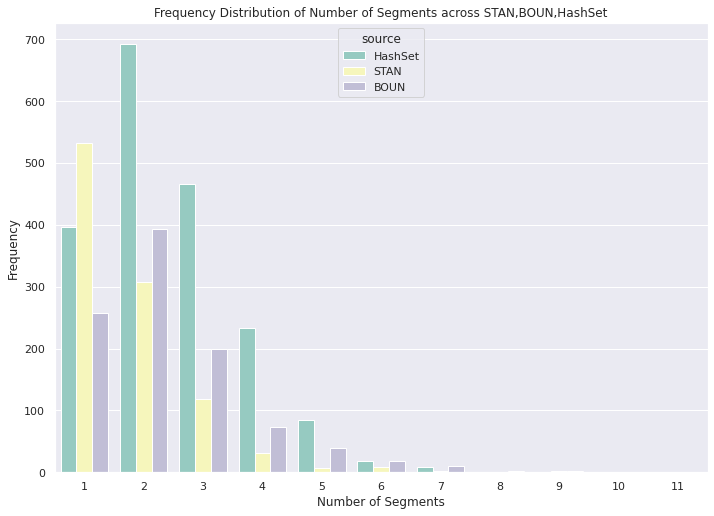

In [58]:
sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='num_segments',hue ='source',data = All,palette = "Set3")
plt.xlabel('Number of Segments')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Number of Segments across STAN,BOUN,HashSet')

In [59]:
df

,Hashtag,1,2,3,4,5,6,7,8,9,...,answer,annotator,annotation_id,created_at,updated_at,lead_time,Final Segmentation,num_segments,num_ne,HashLength
0,bhoomi,bhoomi,bhoom i,bhoo mi,bho omi,b hoomi,bhoo m i,bho om i,bh oomi,bho o mi,...,"{""text"": [""bhoomi"", ""bhoomi""]}",4,1802,2021-12-30T08:14:32.339494Z,2022-01-06T13:31:39.895165Z,130.487,bhoomi,1,1,6
1,dominos,dominos,domino s,do minos,domi nos,domin os,dom inos,dom in os,d ominos,do min os,...,"{""text"": [""dominos"", ""dominos""]}",4,1495,2021-12-19T13:05:36.015797Z,2022-01-06T13:30:46.514042Z,77.056,dominos,1,1,7
2,psgfcgb,psgfcgb,psgfcg b,p sgfcgb,psgfc gb,ps gfcgb,psg fcgb,psgfc g b,psgf cgb,p s gfcgb,...,"{""text"": [""psgfcgb"", ""psgfcgb""]}",1,740,2021-10-26T10:06:59.823018Z,2022-01-06T13:30:13.206473Z,43.687,psg fcgb,2,2,7
3,mazdoorno1,mazdoorno1,mazdoor no1,mazdoorno 1,mazdoor no 1,m azdoorno1,ma zdoorno1,mazdoorn o1,maz doorno1,mazdoorn o 1,...,"{""text"": [""mazdoorno1"", ""mazdoorno1""]}",3,2418,2022-01-05T09:24:57.092193Z,2022-01-05T09:25:03.734694Z,3438.726,mazdoor no 1,3,0,10
4,pappukabhibadleganahi,pappukabhibadleganahi,pappukabhibadleganah i,pappukabhibadlegana hi,pappukabhibadlega nahi,p appukabhibadleganahi,pa ppukabhibadleganahi,pappu kabhibadleganahi,pappukabhibadlegan ahi,pap pukabhibadleganahi,...,"{""text"": [""pappu kabhi badlega nahi"", ""pappuka...",3,2380,2022-01-05T09:08:48.447382Z,2022-01-05T09:09:03.040336Z,2478.165,pappu kabhi badlega nahi,4,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,masterchefturkiye,masterchefturkiye,masterchefturkiy e,masterchefturki ye,m asterchefturkiye,masterchef turkiye,mastercheftur kiye,master chefturkiye,ma sterchefturkiye,mast erchefturkiye,...,masterchefturkiye,4,368,2021-09-24T05:18:49.069344Z,2021-09-24T05:18:49.069390Z,63.433,masterchef turkiye,2,1,17
1897,imacelebrity,imacelebrity,i m a celebrity,im a celebrity,ima celebrity,imacelebrit y,i ma celebrity,i macelebrity,im acelebrity,imacelebri ty,...,imacelebrity,4,367,2021-09-24T05:17:41.910491Z,2021-09-24T05:17:41.910538Z,27.581,i m a celebrity,4,0,12
1898,merryxmas,merry xmas,merry x mas,merryxmas,merryxm as,merryxma s,m erryxmas,me rryxmas,merryx mas,merry xm as,...,merryxmas,4,365,2021-09-24T05:16:47.398608Z,2021-09-24T05:16:47.398669Z,35.430,merry xmas,2,1,9
1899,endbengalviolence,endbengalviolence,endbengalviolenc e,e ndbengalviolence,en dbengalviolence,endbengalviolen ce,endbengal violence,end bengalviolence,end bengal violence,endbengalviole nce,...,endbengalviolence,4,363,2021-09-15T11:27:29.142987Z,2021-09-15T11:27:29.143033Z,36.490,end bengal violence,3,1,17


In [60]:
df['topk'].value_counts()

$1      657
None    447
$2      381
$3      112
$4       64
$5       53
$8       45
$9       41
$6       38
$7       37
$10      26
Name: topk, dtype: int64

### Hashset Distant

In [61]:
hset_dist = pd.read_csv('hashset_distant.csv')

In [62]:
hset_dist.drop(columns = ['Unnamed: 0'],inplace = True)

In [63]:
hset_dist['num_segments'] = hset_dist['Segmented_hashtag'].apply(lambda x :len(x.split()))
hset_dist['HashLength'] = hset_dist['Unsegmented_hashtag'].apply(lambda x : len(x))
hset_dist['isCC'] = hset_dist['Unsegmented_hashtag'].apply(lambda x : is_camel_case(x))


In [64]:
hset_dist

,Unsegmented_hashtag,Segmented_hashtag,Unsegmented_hashtag_lowerCase,Segmented_hashtag_lowerCase,num_segments,HashLength,isCC
0,AajKiBaat,Aaj Ki Baat,aajkibaat,aaj ki baat,3,9,True
1,soldoutABP,soldout ABP,soldoutabp,soldout abp,2,10,True
2,DemocracyOcuupier,Democracy Ocuupier,democracyocuupier,democracy ocuupier,2,17,True
3,HarbaarModisarkaar,Harbaar Modisarkaar,harbaarmodisarkaar,harbaar modisarkaar,2,18,True
4,MemoriesToCherish,Memories To Cherish,memoriestocherish,memories to cherish,3,17,True
...,...,...,...,...,...,...,...
332928,#LachitBorphukanDiwas,Lachit Borphukan Diwas,#lachitborphukandiwas,lachit borphukan diwas,3,21,True
332929,#BycottAdaniAmbani,Bycott Adani Ambani,#bycottadaniambani,bycott adani ambani,3,18,True
332930,#RohitSharma,Rohit Sharma,#rohitsharma,rohit sharma,2,12,True
332931,#ExNaMTV,Ex Na MTV,#exnamtv,ex na mtv,3,8,True


In [65]:
hset_dist['isCC'].value_counts()

True    332933
Name: isCC, dtype: int64

In [66]:
print('Average Segments',hset_dist['num_segments'].mean())
print('Average Length',hset_dist['HashLength'].mean())

Average Segments 2.805522432441362
Average Length 14.68182787527821


In [67]:
cnt = 0 
for a,b in zip(hset_dist['Unsegmented_hashtag'],hset_dist['Segmented_hashtag']):
    if a == b :
        cnt+=1
print('Single token',cnt)

Single token 0


In [68]:
HASH_DISTANT = pd.read_csv('datasets/hashset/HashSet-Distant.csv')

In [69]:
cnt = 0 
for a,b in zip(HASH_DISTANT['Unsegmented_hashtag'],HASH_DISTANT['Segmented_hashtag']):
    if a == b :
        cnt+=1
print('Single token',cnt)

Single token 0


In [70]:
cnt = 0 
for a,b in zip(HASH_DISTANT['Unsegmented_hashtag'],HASH_DISTANT['Segmented_hashtag']):
    if a == b :
        cnt+=1
print('Single token',cnt)

Single token 0


In [71]:
HASH_DISTANT['num_segments'] = HASH_DISTANT['Segmented_hashtag'].apply(lambda x :len(x.split()))
HASH_DISTANT['HashLength'] = HASH_DISTANT['Unsegmented_hashtag'].apply(lambda x : len(x))
HASH_DISTANT['isCC'] = HASH_DISTANT['Unsegmented_hashtag'].apply(lambda x : is_camel_case(x))


In [72]:
print('Average Segments',HASH_DISTANT['num_segments'].mean())
print('Average Length',HASH_DISTANT['HashLength'].mean())

Average Segments 2.8063859636446837
Average Length 14.688089690094712


In [73]:
HASH_DISTANT

,Unnamed: 0,Unnamed: 0.1,Unsegmented_hashtag,Segmented_hashtag,Unsegmented_hashtag_lowerCase,Segmented_hashtag_lowerCase,num_segments,HashLength,isCC
0,0,0,AajKiBaat,Aaj Ki Baat,aajkibaat,aaj ki baat,3,9,True
1,1,1,soldoutABP,soldout ABP,soldoutabp,soldout abp,2,10,True
2,2,2,DemocracyOcuupier,Democracy Ocuupier,democracyocuupier,democracy ocuupier,2,17,True
3,3,3,HarbaarModisarkaar,Harbaar Modisarkaar,harbaarmodisarkaar,harbaar modisarkaar,2,18,True
4,4,4,MemoriesToCherish,Memories To Cherish,memoriestocherish,memories to cherish,3,17,True
...,...,...,...,...,...,...,...,...,...
332161,332928,332928,#LachitBorphukanDiwas,Lachit Borphukan Diwas,#lachitborphukandiwas,lachit borphukan diwas,3,21,True
332162,332929,332929,#BycottAdaniAmbani,Bycott Adani Ambani,#bycottadaniambani,bycott adani ambani,3,18,True
332163,332930,332930,#RohitSharma,Rohit Sharma,#rohitsharma,rohit sharma,2,12,True
332164,332931,332931,#ExNaMTV,Ex Na MTV,#exnamtv,ex na mtv,3,8,True


In [74]:
HASH_DISTANT['isCC'].value_counts()

True    332166
Name: isCC, dtype: int64

In [75]:
len(HASH_DISTANT)

332166

In [76]:
HASHSET= pd.read_csv('datasets/hashset/HashSet-Manual.csv')

In [77]:
HASHSET

,Unnamed: 0,Hashtag,1,2,3,4,5,6,7,8,...,topk,mutlitoken,charner,answer,annotator,annotation_id,created_at,updated_at,lead_time,Final Segmentation
0,0,bhoomi,bhoomi,bhoom i,bhoo mi,bho omi,b hoomi,bhoo m i,bho om i,bh oomi,...,$1,Hashtag has non english token,"[{""start"": 0, ""end"": 6, ""text"": ""bhoomi"", ""lab...","{""text"": [""bhoomi"", ""bhoomi""]}",4,1802,2021-12-30T08:14:32.339494Z,2022-01-06T13:31:39.895165Z,130.487,bhoomi
1,1,dominos,dominos,domino s,do minos,domi nos,domin os,dom inos,dom in os,d ominos,...,$1,Hashtag has named entities,"[{""start"": 0, ""end"": 7, ""text"": ""dominos"", ""la...","{""text"": [""dominos"", ""dominos""]}",4,1495,2021-12-19T13:05:36.015797Z,2022-01-06T13:30:46.514042Z,77.056,dominos
2,2,psgfcgb,psgfcgb,psgfcg b,p sgfcgb,psgfc gb,ps gfcgb,psg fcgb,psgfc g b,psgf cgb,...,$6,Hashtag has named entities,"[{""start"": 3, ""end"": 7, ""text"": ""fcgb"", ""label...","{""text"": [""psgfcgb"", ""psgfcgb""]}",1,740,2021-10-26T10:06:59.823018Z,2022-01-06T13:30:13.206473Z,43.687,psg fcgb
3,3,mazdoorno1,mazdoorno1,mazdoor no1,mazdoorno 1,mazdoor no 1,m azdoorno1,ma zdoorno1,mazdoorn o1,maz doorno1,...,$4,Hashtag has non english token,None,"{""text"": [""mazdoorno1"", ""mazdoorno1""]}",3,2418,2022-01-05T09:24:57.092193Z,2022-01-05T09:25:03.734694Z,3438.726,mazdoor no 1
4,4,pappukabhibadleganahi,pappukabhibadleganahi,pappukabhibadleganah i,pappukabhibadlegana hi,pappukabhibadlega nahi,p appukabhibadleganahi,pa ppukabhibadleganahi,pappu kabhibadleganahi,pappukabhibadlegan ahi,...,None,"{""choices"": [""Hashtag has non english token "",...","[{""start"": 0, ""end"": 5, ""text"": ""pappu"", ""labe...","{""text"": [""pappu kabhi badlega nahi"", ""pappuka...",3,2380,2022-01-05T09:08:48.447382Z,2022-01-05T09:09:03.040336Z,2478.165,pappu kabhi badlega nahi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,1985,masterchefturkiye,masterchefturkiye,masterchefturkiy e,masterchefturki ye,m asterchefturkiye,masterchef turkiye,mastercheftur kiye,master chefturkiye,ma sterchefturkiye,...,$5,Hashtag has named entities,"[{""start"": 0, ""end"": 10, ""text"": ""masterchef"",...",masterchefturkiye,4,368,2021-09-24T05:18:49.069344Z,2021-09-24T05:18:49.069390Z,63.433,masterchef turkiye
1897,1986,imacelebrity,imacelebrity,i m a celebrity,im a celebrity,ima celebrity,imacelebrit y,i ma celebrity,i macelebrity,im acelebrity,...,$2,None,None,imacelebrity,4,367,2021-09-24T05:17:41.910491Z,2021-09-24T05:17:41.910538Z,27.581,i m a celebrity
1898,1987,merryxmas,merry xmas,merry x mas,merryxmas,merryxm as,merryxma s,m erryxmas,me rryxmas,merryx mas,...,$1,Hashtag has named entities,"[{""start"": 5, ""end"": 9, ""text"": ""xmas"", ""label...",merryxmas,4,365,2021-09-24T05:16:47.398608Z,2021-09-24T05:16:47.398669Z,35.430,merry xmas
1899,1988,endbengalviolence,endbengalviolence,endbengalviolenc e,e ndbengalviolence,en dbengalviolence,endbengalviolen ce,endbengal violence,end bengalviolence,end bengal violence,...,$8,Hashtag has named entities,"[{""start"": 3, ""end"": 9, ""text"": ""bengal"", ""lab...",endbengalviolence,4,363,2021-09-15T11:27:29.142987Z,2021-09-15T11:27:29.143033Z,36.490,end bengal violence


In [78]:
HASHSET['num_segments'] = HASHSET['Final Segmentation'].apply(lambda x :len(x.split()))
HASHSET['HashLength'] = HASHSET['Hashtag'].apply(lambda x : len(x))
HASHSET['isCC'] = HASHSET['Hashtag'].apply(lambda x : is_camel_case(x))

In [79]:
print('Average Segments',HASHSET['num_segments'].mean())
print('Average Length',HASHSET['HashLength'].mean())

Average Segments 2.485007890583903
Average Length 12.675960021041558


In [80]:
cnt = 0 
for index,row in HASHSET.iterrows():
    #print(row[0])
    #ne = row['charner']
    choices = row['mutlitoken']
    try:
        isner = eval(choices)
    except:
        isner = choices
    if type(isner) is str and isner == "Hashtag has named entities":
        #print(row['Hashtag'])
        cnt+=1
    if type(isner) is dict and 'Hashtag has named entities' in isner['choices']:
        #print(row['Hashtag'])
        cnt+=1
print("Hashtag has named entities", cnt)

Hashtag has named entities 1414


In [81]:
cnt=0
ans_list = []
for index,rows in HASHSET.iterrows():
    htg = rows['Hashtag']
    topk = str(rows['topk'])
    answer = ""
    if topk == "Ambigous":
        ans_list.append('AMBIGOUS')
        continue
    if topk != "None": 
        topk = topk.replace("$","")
        answer = rows[topk]
        #print('Answer in top 10:',answer)
    else:
        try:
            xx = eval(rows['answer'])
            answer = xx['text'][0]
            #print('dict',answer)

        except:
            answer = rows['answer']
            #print('str',answer)
            
    ans_list.append(answer)
    if answer == htg:
        cnt+=1
print('Single Token Hashtags',cnt)

Single Token Hashtags 396


In [82]:
cnt = 0 
for index,row in HASHSET.iterrows():
    #print(row[0])
    #ne = row['charner']
    choices = row['mutlitoken']
    try:
        isner = eval(choices)
    except:
        isner = choices
    if type(isner) is str and isner == "Hashtag has non english token ":
        #print(row['Hashtag'])
        cnt+=1
    if type(isner) is dict and 'Hashtag has non english token ' in isner['choices']:
        #print(row['Hashtag'])
        cnt+=1
print("Hashtags with non-english tokens", cnt)

Hashtags with non-english tokens 236


In [83]:
cnt = 0 
for index,row in HASHSET.iterrows():
    #print(row[0])
    #ne = row['charner']
    choices = row['mutlitoken']
    try:
        isner = eval(choices)
    except:
        isner = choices
    if type(isner) is str and isner == "Hashtag has a mix of english and hindi tokens":
        #print(row['Hashtag'])
        cnt+=1
    if type(isner) is dict and "Hashtag has a mix of english and hindi tokens" in isner['choices']:
        #print(row['Hashtag'])
        cnt+=1
print("Hashtag has mix", cnt)

Hashtag has mix 92


In [84]:
HASH_DISTANT['Unsegmented_hashtag'].nunique()

332166

In [85]:
import pickle
stan_small = pd.read_pickle('datasets/stan-small-bansal_et_al.pkl')
stan_large = pd.read_pickle('datasets/stan-large-maddela_et_al_test.pkl')
stan_large2 = pd.read_pickle('datasets/stan-large-maddela_et_al_train.pkl')
stan_large3 = pd.read_pickle('datasets/stan-large-maddela_et_al_dev.pkl')

In [86]:
stan_small

,hashtags,goldtruths
0,Typo3,"[Typo3, TYPO3]"
1,KolacheFactory,[Kolache Factory]
2,moanmondays,[moan mondays]
3,semantic,[semantic]
4,babypunch,[baby punch]
...,...,...
1103,ialreadysoldmysoultoplantsvszombies,[i already sold my soul to plants vs zombies]
1104,iamsograceful,[i am so graceful]
1105,buffalo,[buffalo]
1106,marsiscoming,"[Mars is coming, mars is coming]"


In [87]:
stan_large

,hashtags,goldtruths
0,LT,[LT]
1,imsb,[imsb]
2,FollowWeekend,"[follow weekend, Follow Weekend]"
3,SkinSunday,[Skin Sunday]
4,data,[data]
...,...,...
9442,DEMF,[DEMF]
9443,derby,[derby]
9444,damnheroin,[damn heroin]
9445,Samaya,[Samaya]


In [88]:
stan_large2

,hashtags,goldtruths
0,eclipse,"[eclipse, Eclipse]"
1,k,"[K, k]"
2,pmqs,[pmqs]
3,stupidaccident,[stupid accident]
4,addictivetvshows,[Addictive TV Shows]
...,...,...
2513,baller,[baller]
2514,NHLdraft,[NHL draft]
2515,virtualbox,"[VirtualBox, virtualbox]"
2516,followdriday,[follow dri day]


In [89]:
stan_large = stan_large.append(stan_large2)
stan_large = stan_large.append(stan_large3)

In [90]:
stan_large = stan_large.drop_duplicates(subset = "hashtags",keep = "first")

In [91]:
stan_large['hashtags'].nunique()

11965

In [92]:
stan_large

,hashtags,goldtruths
0,LT,[LT]
1,imsb,[imsb]
2,FollowWeekend,"[follow weekend, Follow Weekend]"
3,SkinSunday,[Skin Sunday]
4,data,[data]
...,...,...
2513,baller,[baller]
2514,NHLdraft,[NHL draft]
2515,virtualbox,"[VirtualBox, virtualbox]"
2516,followdriday,[follow dri day]


In [93]:
stan_large['isCC'] = stan_large['hashtags'].apply(lambda x : is_camel_case(x))
stan_small['isCC'] = stan_small['hashtags'].apply(lambda x : is_camel_case(x))
stan_large['num_segments'] = stan_large['goldtruths'].apply(lambda x :len(x[0].split()))
stan_large['HashLength'] = stan_large['hashtags'].apply(lambda x : len(x))
stan_small['num_segments'] = stan_small['goldtruths'].apply(lambda x :len(x[0].split()))
stan_small['HashLength'] = stan_small['hashtags'].apply(lambda x : len(x))

In [94]:
stan_large['isCC'].value_counts()

False    10524
True      1441
Name: isCC, dtype: int64

In [95]:
stan_small['isCC'].value_counts()

False    1000
True      108
Name: isCC, dtype: int64

In [96]:
len(stan_small)

1108

In [97]:
stan_large['num_segments'].mean()

1.7393230254910155

In [98]:
stan_small['num_segments'].mean()

1.782490974729242

In [99]:
stan_small['HashLength'].mean()

8.983754512635379

In [100]:
stan_large['HashLength'].mean()

8.585875470121186

In [101]:
stan_large

,hashtags,goldtruths,isCC,num_segments,HashLength
0,LT,[LT],False,1,2
1,imsb,[imsb],False,1,4
2,FollowWeekend,"[follow weekend, Follow Weekend]",True,2,13
3,SkinSunday,[Skin Sunday],True,2,10
4,data,[data],False,1,4
...,...,...,...,...,...
2513,baller,[baller],False,1,6
2514,NHLdraft,[NHL draft],True,2,8
2515,virtualbox,"[VirtualBox, virtualbox]",False,1,10
2516,followdriday,[follow dri day],False,3,12


In [102]:
stan_large = stan_large.reset_index().drop(columns = ['index'])

In [103]:
cnt = 0 
for idx,row in stan_large.iterrows():
    if row['hashtags'] == row['goldtruths'][0]:
        cnt+=1
print('stan_large',cnt,cnt/len(stan_large))  

stan_large 4749 0.3969076473046385


In [104]:
cnt = 0 
for idx,row in stan_small.iterrows():
    if row['hashtags'] == row['goldtruths'][0]:
        cnt+=1
print('stan_large',cnt,cnt/len(stan_small))  

stan_large 453 0.40884476534296027


In [105]:
All2 = All[['num_segments','source']]
stan_large['source'] = 'STAN-Large'
stan_small['source'] = 'STAN-Small'

In [106]:
All2 = All2.append(stan_large[['num_segments','source']])
All2 = All2.append(stan_small[['num_segments','source']])

In [107]:
All2

,num_segments,source
0,1,HashSet
1,1,HashSet
2,2,HashSet
3,3,HashSet
4,4,HashSet
...,...,...
1103,9,STAN-Small
1104,4,STAN-Small
1105,1,STAN-Small
1106,3,STAN-Small


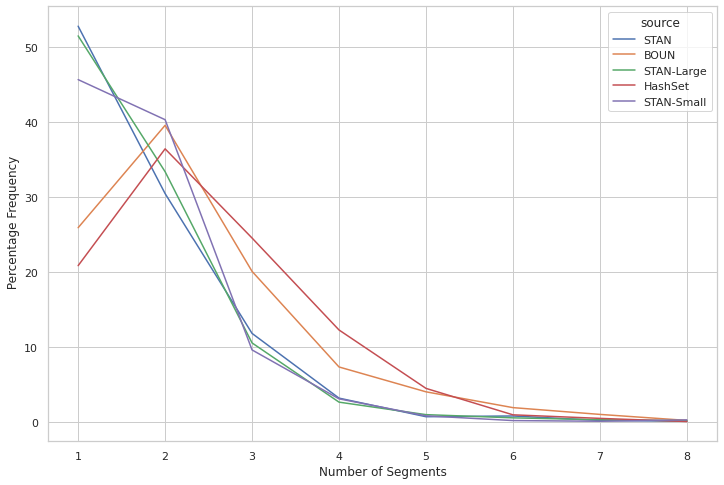

In [122]:
Allx = All2.loc[All2['num_segments'] <= 8]
occupation_counts = (Allx.groupby(['source'])['num_segments']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('num_segments'))

sns.set(rc={'figure.figsize':(12,8)})
sns.set_theme(style = 'whitegrid')
sns.lineplot(x="num_segments", y="percentage", hue="source", data=occupation_counts)
plt.xlabel('Number of Segments')
plt.ylabel(' Percentage Frequency')
plt.savefig('FreqPlot.png')

In [109]:
stan_large['num_segments'].value_counts()


1     6147
2     3985
3     1258
4      315
5      116
6       65
7       35
8       19
9       12
10       4
11       4
23       1
30       1
13       1
19       1
16       1
Name: num_segments, dtype: int64

In [110]:
stan_small['num_segments'].value_counts()

1     504
2     445
3     106
4      34
5       9
8       3
6       2
9       2
10      1
11      1
7       1
Name: num_segments, dtype: int64

In [111]:
a = stan_large.loc[stan_large['num_segments'] == 30]

In [112]:
for z in a['goldtruths']:
    print(len(z[0].split()))

30


In [113]:
stan_large

,hashtags,goldtruths,isCC,num_segments,HashLength,source
0,LT,[LT],False,1,2,STAN-Large
1,imsb,[imsb],False,1,4,STAN-Large
2,FollowWeekend,"[follow weekend, Follow Weekend]",True,2,13,STAN-Large
3,SkinSunday,[Skin Sunday],True,2,10,STAN-Large
4,data,[data],False,1,4,STAN-Large
...,...,...,...,...,...,...
11960,baller,[baller],False,1,6,STAN-Large
11961,NHLdraft,[NHL draft],True,2,8,STAN-Large
11962,virtualbox,"[VirtualBox, virtualbox]",False,1,10,STAN-Large
11963,followdriday,[follow dri day],False,3,12,STAN-Large
